Estimate the upper bound of the rank

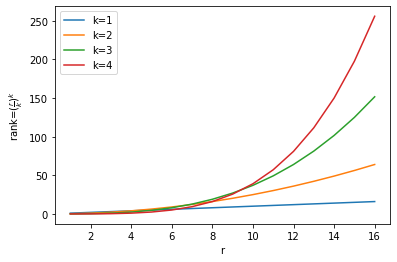

In [3]:
import matplotlib.pyplot as plt

# Define values for r
r_values = range(1, 17)

# Define values for k
k_values = range(1, 5)

# Loop through k values and plot (r/k)^k for each value
for k in k_values:
    y_values = [(r / k) ** k for r in r_values]
    plt.plot(r_values, y_values, label=f"k={k}")

# Add labels and legend to the plot
plt.xlabel("r")
plt.ylabel("rank=$(\\frac{r}{k})^k$")
plt.legend()

# Show the plot
plt.show()


Experiment on the method

In [68]:
import numpy as np
import matplotlib.pyplot as plt

def estimator(m_rows = 768, n_rows=1024, r=16, k=4, rugularization=False):
    assert(r % k == 0)
    rr = r // k
    num_experiments = 100
    print(f"trainable: {(m_rows+n_rows)*r}, partion: {(m_rows+n_rows)*r/(m_rows * n_rows)}")
    est = min(m_rows, n_rows, rr**k)
    print(f"r={r}, estimate rank of delta: {est}")
    # Initialize an array to store the rank of each matrix
    ranks = np.zeros(num_experiments)

    # Run the experiments
    for i in range(num_experiments):
        # Generate the Wi matrices
        U = np.random.normal(size=(m_rows, r))
        V = np.random.normal(size=(n_rows, r))
        if rugularization:
            U = np.tanh(U)
            V = np.tanh(V)
        # Computer W
        for j in range(k):
            if j==0:
                W = U[:, j * rr : (j+1) * rr ].dot(V[:, j * rr : (j+1) * rr].T)
            else:
                W *= U[:, j * rr : (j+1) * rr ].dot(V[:, j * rr : (j+1) * rr].T)
        # Compute the rank of the W matrix
        rank = np.linalg.matrix_rank(W)
        ranks[i] = rank

    # Display the histogram of ranks
    plt.hist(ranks,bins=range(1, 1+est))
    plt.xlabel('Rank')
    plt.ylabel('Frequency')
    plt.show()

trainable: 3000, partion: 0.3
r=15, estimate rank of delta: 100


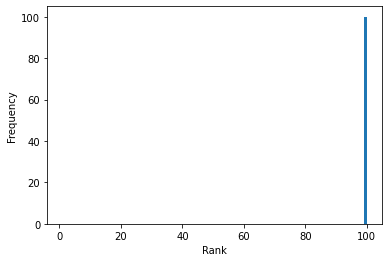

trainable: 28672, partion: 0.036458333333333336
r=16, estimate rank of delta: 256


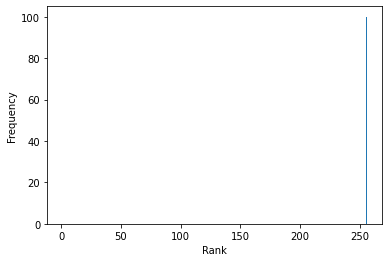

In [72]:
estimator(m_rows = 100, n_rows=100, r=15, k=3, rugularization=True)
estimator(rugularization=True)